### 최적화 중

#### 경사하강법

In [18]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 한글문제 해결

In [21]:
from matplotlib import rcParams, font_manager, rc
import warnings

# 맑은고딕으로 변경
font_path = 'C:/Windows/Fonts/malgun.ttf' 
font = font_manager.FontProperties(fname=font_path, size=10).get_name()

# warning 표시끄기
warnings.simplefilter('ignore') # 경고메시지 무시

# 기본폰트 설정
plt.rcParams['font.family'] = font
# 기본폰트 사이즈 설정
plt.rcParams['font.size'] = 12
# 기본차트 사이즈 변경
plt.rcParams['figure.figsize'] = (12, 5)
# 기본그리드 표시
plt.rcParams['axes.grid'] = True
# 한글화 후 마이너스표시 네모를 정상출력
plt.rcParams['axes.unicode_minus'] = False

In [22]:
# Seaboarn 사용시는 나눔고딕이 안됨. 맑은 고딕
sns.set(font=font, rc={'axes.unicode_minus':False}, style='darkgrid')

## set() is deprecated refered by https://seaborn.pydata.org/generated/seaborn.set_theme.html

In [23]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='malgun gothic', font_scale=1, color_codes=True, rc=None)

In [24]:
%matplotlib inline

In [25]:
def f1(x):
    return 3*x**2 + 6*x + 1

def f1d(x):
    '''f1(x)의 도함수 정의'''
    return 6*x + 6

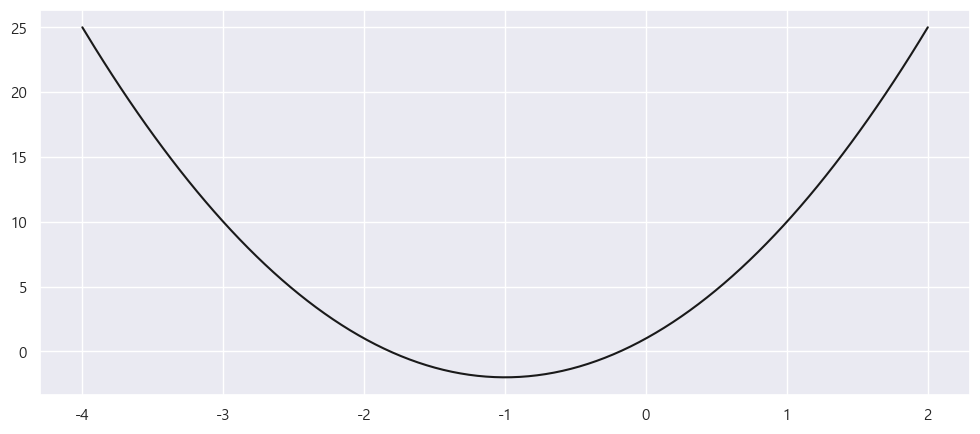

In [26]:
xx = np.linspace(-4, 2, 200)
plt.plot(xx, f1(xx), 'k-')
plt.show()

In [27]:
step_size = 0.1

start:x_0 = -3.00, g_0 = -12.00


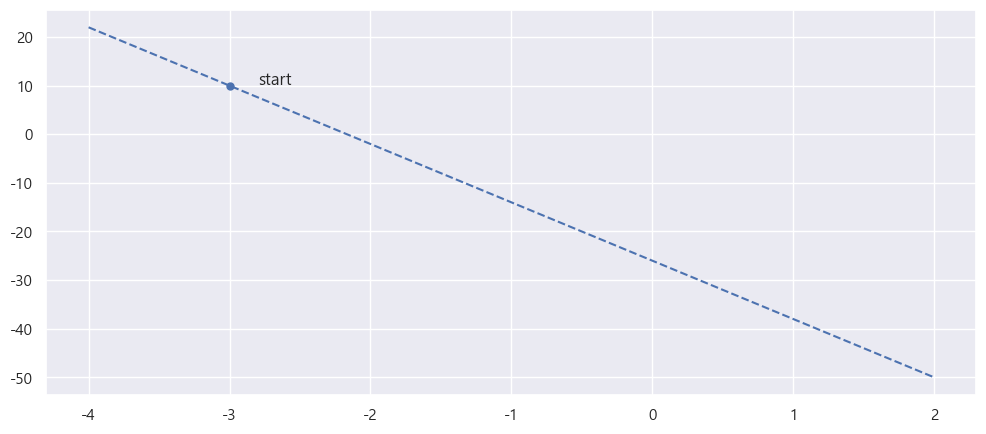

In [28]:
## start
x = -3
plt.plot(x, f1(x), 'bo', markersize=5)
plt.text(x + 0.2, f1(x) + 0.1, 'start')
plt.plot(xx, f1d(x)*(xx - x)+f1(x), 'b--')
print(f'start:x_0 = {x:.2f}, g_0 = {f1d(x):.2f}')

#### 통합

start:x_0 = -3.00, g_0 = -12.00


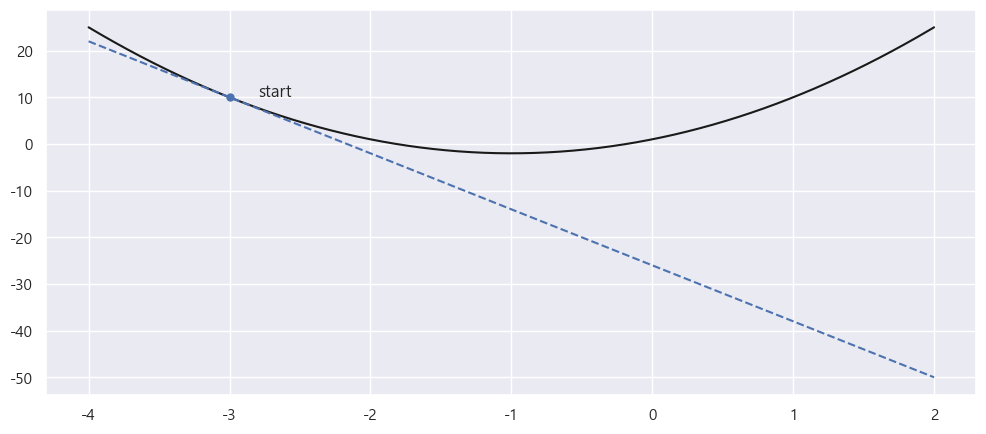

In [29]:
xx = np.linspace(-4, 2, 200)
plt.plot(xx, f1(xx), 'k-')

step_size = 0.1

## start
x = -3
plt.plot(x, f1(x), 'bo', markersize=5)
plt.text(x + 0.2, f1(x) + 0.1, 'start')
plt.plot(xx, f1d(x)*(xx - x)+f1(x), 'b--')
print(f'start:x_0 = {x:.2f}, g_0 = {f1d(x):.2f}')
plt.show()

start:x_0 = -3.00, g_0 = -12.00
1st step:x_1 = -1.80, g_1 = -4.80
2nd step:x_2 = -1.32, g_2 = -1.92


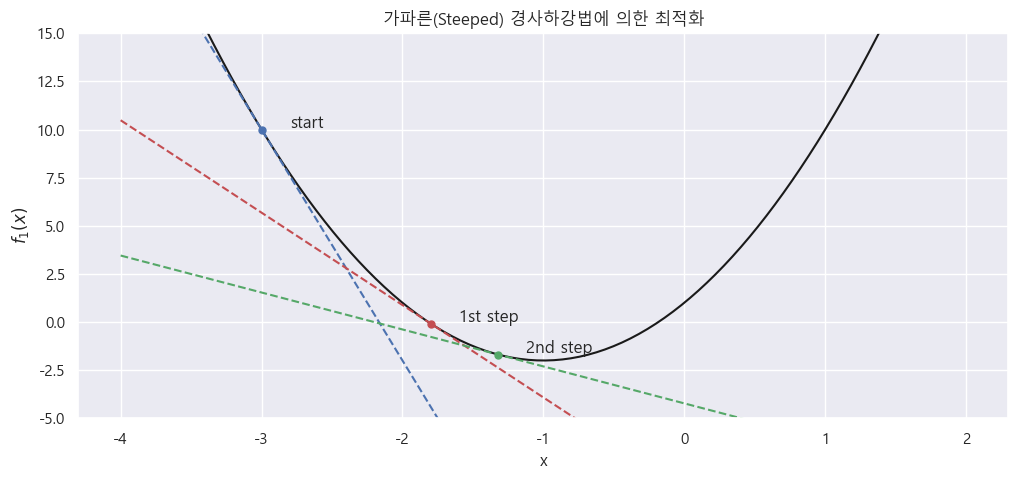

In [30]:
xx = np.linspace(-4, 2, 200)
plt.plot(xx, f1(xx), 'k-')

step_size = 0.1

## start
x = -3
plt.plot(x, f1(x), 'bo', markersize=5)
plt.text(x + 0.2, f1(x) + 0.1, 'start')
plt.plot(xx, f1d(x)*(xx - x)+f1(x), 'b--')
print(f'start:x_0 = {x:.2f}, g_0 = {f1d(x):.2f}')


# k = 1
x = x - step_size * f1d(x)
plt.plot(x, f1(x), 'ro', markersize=5)
plt.text(x + 0.2, f1(x) + 0.1, '1st step')
plt.plot(xx, f1d(x)*(xx-x)+f1(x), 'r--')
print(f'1st step:x_1 = {x:.2f}, g_1 = {f1d(x):.2f}')

# k = 2
x = x - step_size * f1d(x)
plt.plot(x, f1(x), 'go', markersize=5)
plt.text(x + 0.2, f1(x) + 0.1, '2nd step')
plt.plot(xx, f1d(x)*(xx-x)+f1(x), 'g--')
print(f'2nd step:x_2 = {x:.2f}, g_2 = {f1d(x):.2f}')

plt.ylim(-5, 15)
plt.xlabel('x')
plt.ylabel('$f_1(x)$') # 수식 표현
plt.title('가파른(Steeped) 경사하강법에 의한 최적화')
plt.grid(True)

plt.show()

#### 파이토치 없는 넘파이 선형회귀

In [31]:
lr = 0.1
n_iter = 100

x_train = np.array([[1],[2],[3]])
y_train = np.array([[2],[4],[6]])
x_train_b = np.c_[np.ones((len(x_train), 1)), x_train]
theta = np.random.randn(2, 1)

In [32]:
x_train

array([[1],
       [2],
       [3]])

In [33]:
y_train

array([[2],
       [4],
       [6]])

In [34]:
x_train_b

array([[1., 1.],
       [1., 2.],
       [1., 3.]])

In [35]:
theta

array([[-0.14780746],
       [ 0.5521846 ]])

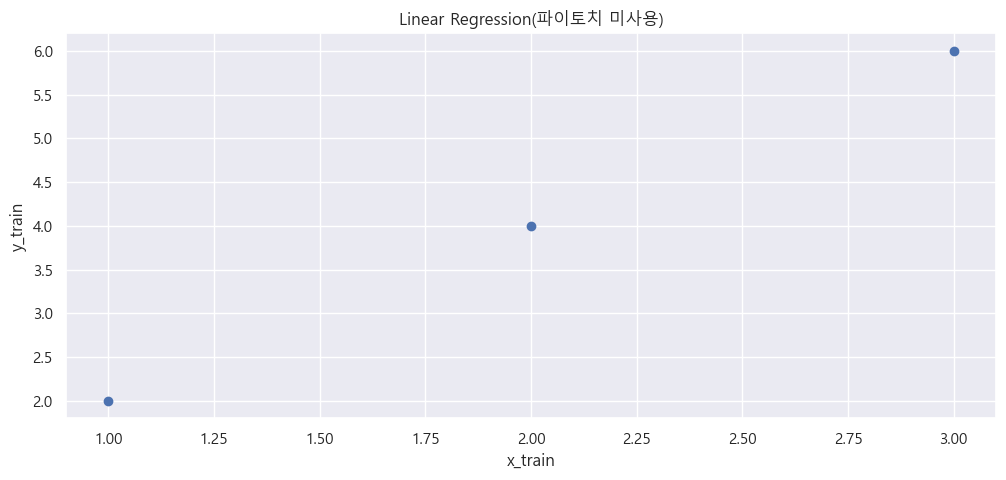

In [36]:
plt.scatter(x_train, y_train)
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.grid(True)
plt.title('Linear Regression(파이토치 미사용)')
plt.show()

In [57]:
## 목적함수
def cal_cost(theta, x, y):
    m = len(y)
    pred = x.dot(theta)
    cost = 1/(2*m)* np.sum(np.square(pred - y))
    return cost

In [58]:
## 경사하강
def gradient_descent(x, y, theta, lr=0.01, n_iter=100):
    m = len(y)
    cost_history = np.zeros(n_iter)
    theta_history = np.zeros((n_iter, 2))
    
    for iter in range(n_iter):
        pred = np.dot(x, theta)
        theta = theta - (1/m)*lr*(x.T.dot(pred - y))
        cost_history[iter] = cal_cost(theta, x, y)
        theta_history[iter, :] = theta.T

    return theta, cost_history, theta_history

In [39]:
theta

array([[-0.14780746],
       [ 0.5521846 ]])

In [65]:
## 값 구하기
theta, cost_history, theta_history = gradient_descent(x_train_b, y_train, theta, lr, n_iter)

In [66]:
f'bias b: {theta[0,0]}'

'bias b: 0.010890599052414164'

In [67]:
f'weight w : {theta[1, 0]}'

'weight w : 1.9952092067848544'

In [68]:
f'Final cost : {cost_history[-1]}'

'Final cost : 8.507323565866846e-06'

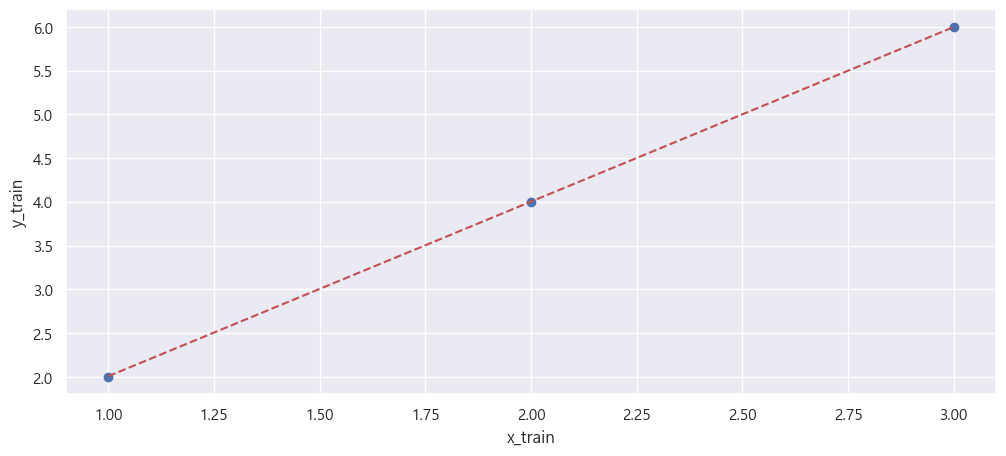

In [69]:
## 차트그리기
plt.scatter(x_train, y_train)
plt.plot(x_train, theta[1, 0]* x_train + theta[0,0], 'r--')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.grid(True)
plt.show()

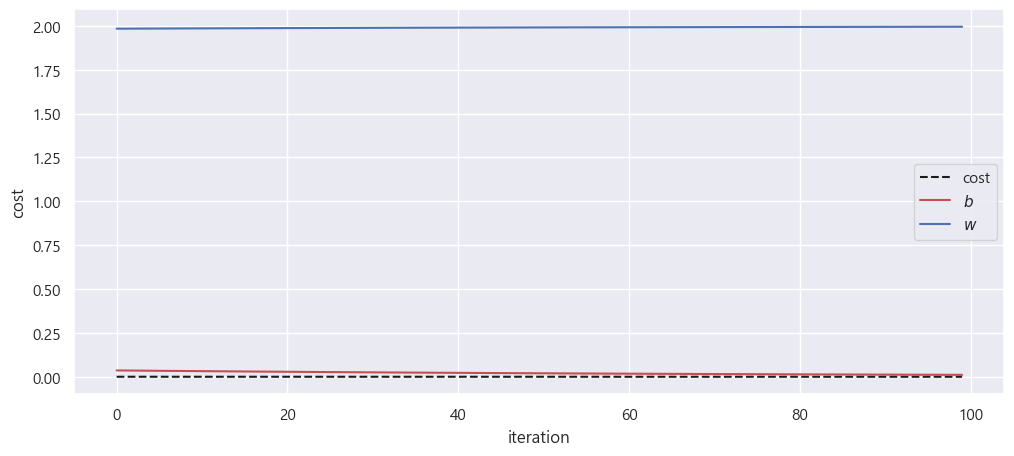

In [70]:
plt.plot(cost_history, 'k--', label='cost')
plt.plot(theta_history[:, 0], 'r-', label='$b$')
plt.plot(theta_history[:, 1], 'b-', label='$w$')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('cost')
plt.grid(True)
plt.show()